In [1]:
#記得要import
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#這兩行不用運行，只是我導入csv整理成跟你一樣的格式
pz = pd.read_csv("Z:\\07個人\\ChiehLin\\pz.csv")
pz = pz.set_index('key_0').sort_index().set_index(pd.to_datetime(pz.rename(columns={'key_0':'Date'}).set_index('Date').sort_index().index))

In [3]:
#把星期六和星期日的日期都減兩天變成星期四跟星期五再跟原本非六日的data合併
pz_sun_sat_to_fri= pd.concat([pz[~(pz.index.weekday.isin([5,6]))],pz[pz.index.weekday.isin([5,6])].set_index(pz[pz.index.weekday.isin([5,6])].index-dt.timedelta(days=2))]).sort_index()

In [4]:
pz_resample= pz_sun_sat_to_fri.resample('W-FRI',closed = 'right').sum()

<AxesSubplot:xlabel='Date'>

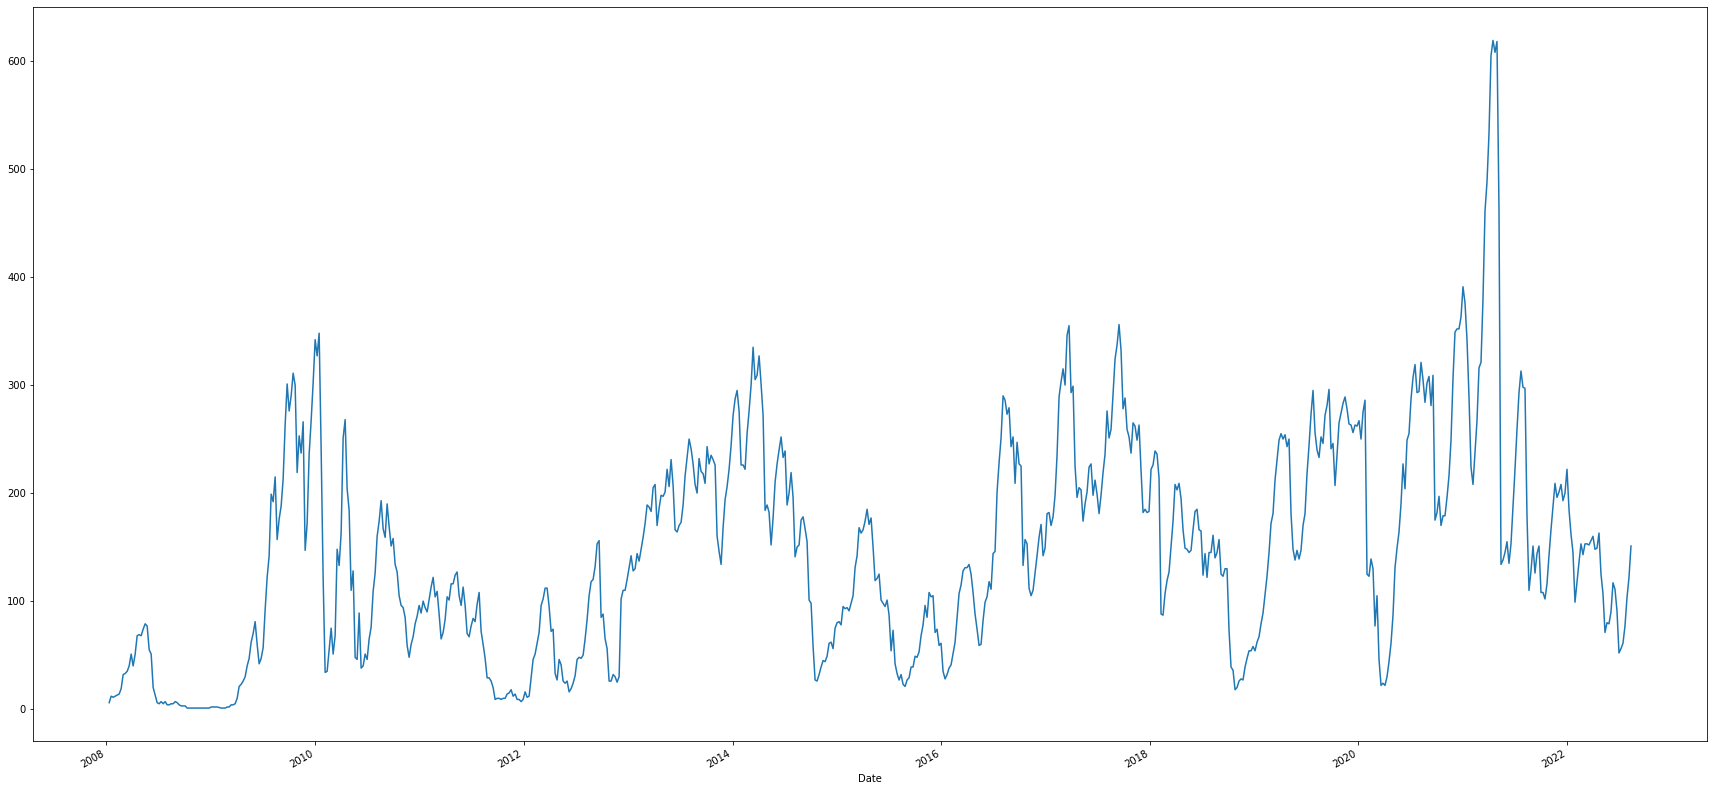

In [9]:
plt.rc('figure', figsize=(30, 15))
pz_resample.sum(axis=1)[pz_resample.sum(axis=1)!=0].plot()